In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data arrays
Ring_no = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
x_mm = np.array([9.93, 9.68, 9.51, 9.36, 9.229999999999999, 9.129999999999999, 9.03, 8.92, 8.84, 8.75, 8.66, 8.59, 8.51, 8.45, 8.37, 8.299999999999999, 8.239999999999998, 8.17, 8.12, 8.049999999999999])
x_prime_mm = np.array([11.260000000000002, 11.46, 11.620000000000001, 11.760000000000002, 11.9, 12.020000000000001, 12.13, 12.23, 12.31, 12.4, 12.49, 12.57, 12.65, 12.71, 12.780000000000001, 12.84, 12.91, 12.98, 13.040000000000001, 13.07])

# Calculate (x'-x) and (x'-x)^2
dia = x_prime_mm - x_mm
diaSquare = dia ** 2

# Calculate the absolute differences between each pair of points in diaSquare
differences = np.abs(diaSquare[:, np.newaxis] - diaSquare)

# Find the minimum of these differences, excluding the zero difference (diagonal)
min_difference = np.min(differences[np.nonzero(differences)])

print("Minimum difference between elements in diaSquare:", min_difference, differences)

Minimum difference between elements in diaSquare: 0.9939999999999962 [[ 0.      1.3995  2.6832  3.9911  5.36    6.5832  7.8411  9.1872 10.272
  11.5536 12.9    14.0715 15.3707 16.3787 17.6792 18.8427 20.04   21.3672
  22.4375 23.4315]
 [ 1.3995  0.      1.2837  2.5916  3.9605  5.1837  6.4416  7.7877  8.8725
  10.1541 11.5005 12.672  13.9712 14.9792 16.2797 17.4432 18.6405 19.9677
  21.038  22.032 ]
 [ 2.6832  1.2837  0.      1.3079  2.6768  3.9     5.1579  6.504   7.5888
   8.8704 10.2168 11.3883 12.6875 13.6955 14.996  16.1595 17.3568 18.684
  19.7543 20.7483]
 [ 3.9911  2.5916  1.3079  0.      1.3689  2.5921  3.85    5.1961  6.2809
   7.5625  8.9089 10.0804 11.3796 12.3876 13.6881 14.8516 16.0489 17.3761
  18.4464 19.4404]
 [ 5.36    3.9605  2.6768  1.3689  0.      1.2232  2.4811  3.8272  4.912
   6.1936  7.54    8.7115 10.0107 11.0187 12.3192 13.4827 14.68   16.0072
  17.0775 18.0715]
 [ 6.5832  5.1837  3.9     2.5921  1.2232  0.      1.2579  2.604   3.6888
   4.9704  6.3168  7.4883

In [2]:
import numpy as np
from scipy.optimize import curve_fit

# Define a linear function for fitting
def linear(x, m, c):
    return m * x + c

# Fit the data using curve_fit
params, _ = curve_fit(linear, Ring_no, diaSquare)
slope, intercept = params

# Generate fitted line data
fitted_line = linear(Ring_no, slope, intercept)

# Calculate residuals
residuals = diaSquare - fitted_line

# Calculate the standard deviation of the residuals
std_residuals = np.std(residuals)

print("Standard deviation of the points from the fitted line:", std_residuals, residuals)

Standard deviation of the points from the fitted line: 0.16007275257493633 [-0.33135571 -0.16744932 -0.11934293 -0.04703654  0.08626985  0.07387624
  0.09618263  0.20668902  0.05589541  0.1019018   0.2127082   0.14861459
  0.21222098 -0.01537263  0.04953376 -0.02255985 -0.06085346  0.03075293
 -0.13454068 -0.37613429]


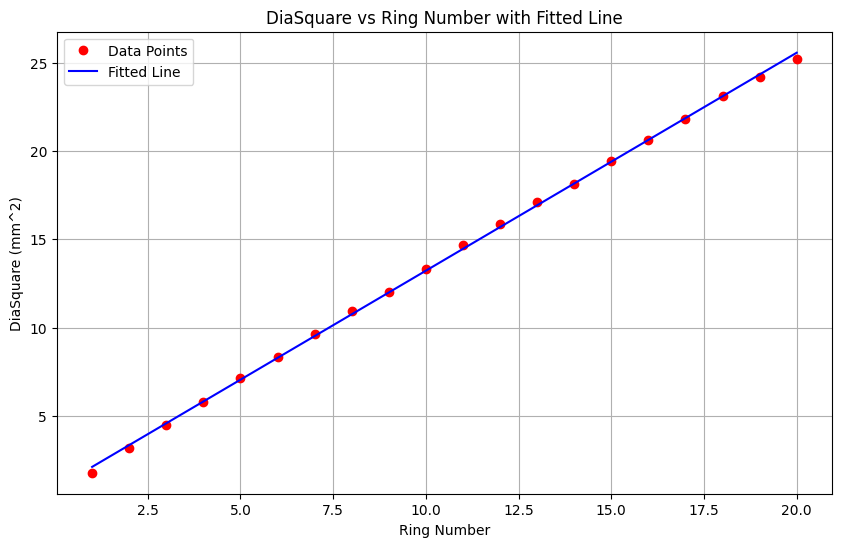

In [3]:
# Plot the data and the fitted line
plt.figure(figsize=(10, 6))
plt.plot(Ring_no, diaSquare, 'o', label='Data Points', color='red')
plt.plot(Ring_no, fitted_line, '-', label='Fitted Line', color='blue')
plt.title('DiaSquare vs Ring Number with Fitted Line')
plt.xlabel('Ring Number')
plt.ylabel('DiaSquare (mm^2)')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Print the slope and intercept
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 1.2355936090230706
Intercept: 0.8646621052628671


In [5]:
# Given value of lambda in angstroms, convert to meters
lambda_angstrom = 5893
lambda_meters = lambda_angstrom * 1e-10

# Calculate R using the equation slope = 4 * lambda * R
# Convert slope from mm^2 to m^2 for consistency in units
slope_m2 = slope * 1e-6
R = slope_m2 / (4 * lambda_meters)

R2 = std_residuals * 1e-6 / (4 * lambda_meters)

# Print the calculated value of R
print("Calculated value of R:", R*100, "Centimeters", R2*100)


Calculated value of R: 52.417852071231565 Centimeters 6.790800635284929


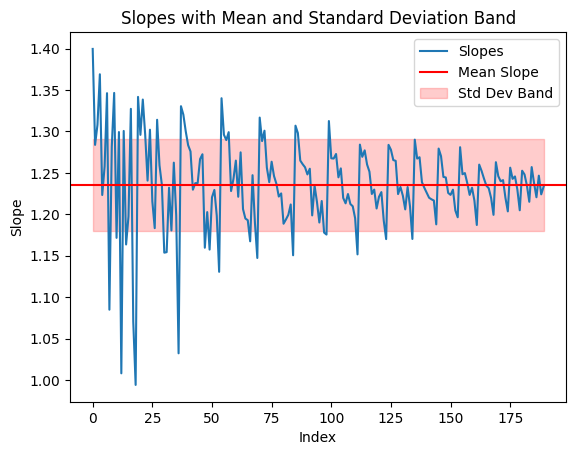

1.2355698235704426 0.05575323082172055


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_slope(x1, y1, x2, y2):
    return (y2 - y1) / (x2 - x1)

# Calculate slopes for every pair of points and their differences
slopes_with_diff = []
for i in range(len(Ring_no)):
    for j in range(i + 1, len(Ring_no)):
        slope_ij = calculate_slope(Ring_no[i], diaSquare[i], Ring_no[j], diaSquare[j])
        diff_ij = abs(Ring_no[j] - Ring_no[i])
        slopes_with_diff.append((slope_ij, diff_ij))

# Sort slopes by the difference between the points
slopes_with_diff.sort(key=lambda x: x[1])

# Extract the sorted slopes
sorted_slopes = [slope for slope, diff in slopes_with_diff]

# Convert sorted slopes to a numpy array
slopes = np.array(sorted_slopes)

radius = slopes / (4 * lambda_meters)

# Plot the slopes
plt.plot(slopes, label='Slopes')

# Calculate the mean and standard deviation
mean_slope = slopes.mean()
std_slope = slopes.std()

# Plot the mean line
plt.axhline(y=mean_slope, color='r', linestyle='-', label='Mean Slope')

# Plot the standard deviation band
plt.fill_between(range(len(slopes)), mean_slope - std_slope, mean_slope + std_slope, color='r', alpha=0.2, label='Std Dev Band')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Slope')
plt.title('Slopes with Mean and Standard Deviation Band')
plt.legend()

# Show the plot
plt.show()

# Print the slopes
print(mean_slope, std_slope)

In [7]:
max(radius), min(radius)

(593712.8796877647, 421686.7469879502)

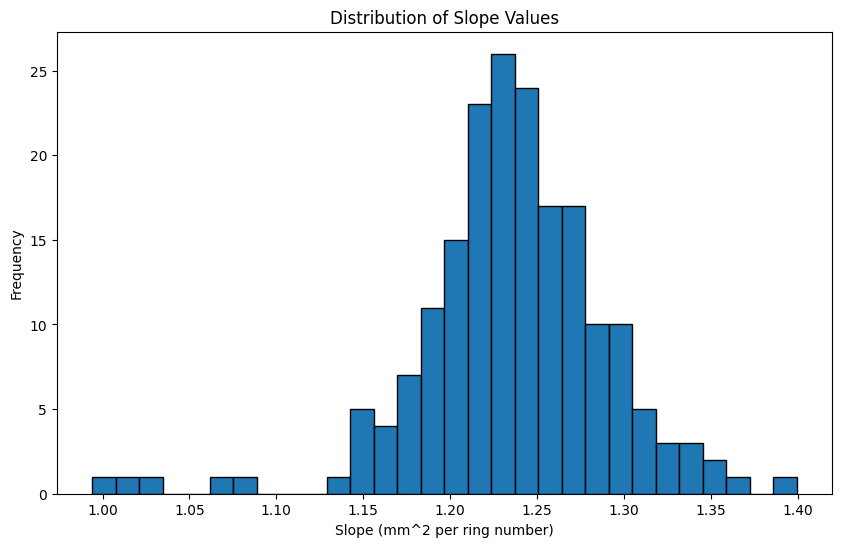

In [8]:
# Plot the slopes as a histogram
plt.figure(figsize=(10, 6))
plt.hist(slopes, bins=30, edgecolor='black')
plt.title('Distribution of Slope Values')
plt.xlabel('Slope (mm^2 per ring number)')
plt.ylabel('Frequency')
# plt.grid(True)
plt.show()

In [9]:
# Calculate the mean and standard deviation of the slopes
mean_slope = np.mean((slopes*1e-4)/(4*lambda_meters))
std_slope = np.std(slopes/(4*lambda_meters))

print(max(slopes/(4*lambda_meters)), min(slopes/(4*lambda_meters)))



# Print the mean and standard deviation
print("Mean of slopes:", mean_slope)
print("Standard deviation of slopes:", std_slope)

593712.8796877647 421686.7469879502
Mean of slopes: 52.41684301588504
Standard deviation of slopes: 23652.31241376232


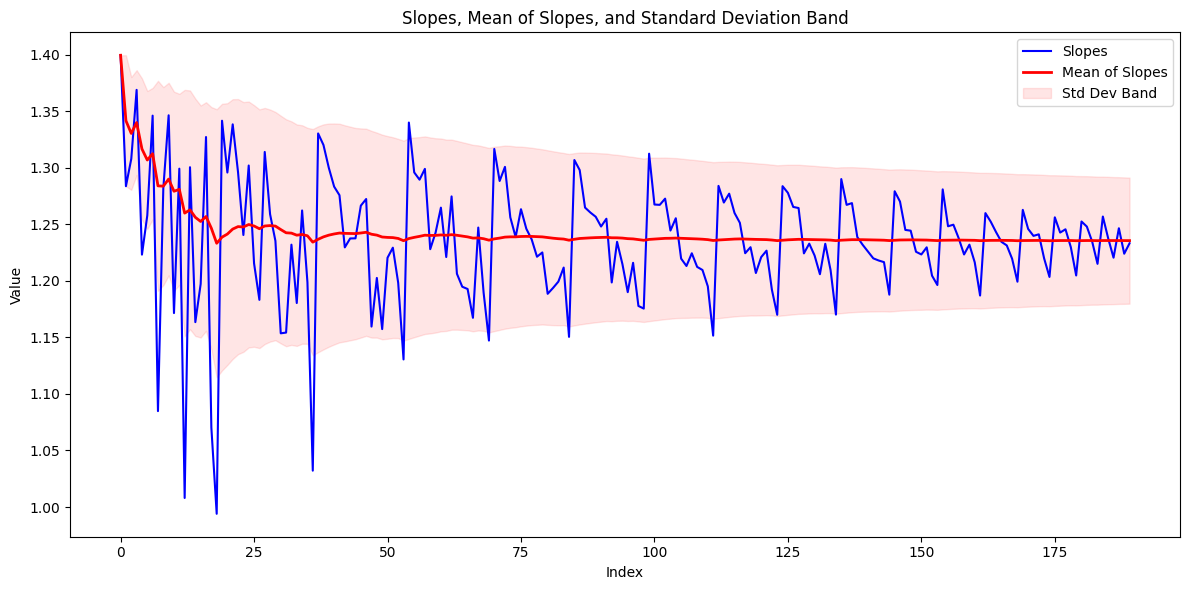

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_slope(x1, y1, x2, y2):
    return (y2 - y1) / (x2 - x1)

# Calculate slopes for every pair of points and their differences
slopes_with_diff = []
for i in range(len(Ring_no)):
    for j in range(i + 1, len(Ring_no)):
        slope_ij = calculate_slope(Ring_no[i], diaSquare[i], Ring_no[j], diaSquare[j])
        diff_ij = abs(Ring_no[j] - Ring_no[i])
        slopes_with_diff.append((slope_ij, diff_ij))

# Sort slopes by the difference between the points
slopes_with_diff.sort(key=lambda x: x[1])

# Extract the sorted slopes
sorted_slopes = [slope for slope, diff in slopes_with_diff]

# Convert sorted slopes to a numpy array
slopes = np.array(sorted_slopes)

# Calculate mean and std for increasing subsets of slopes
means = []
std_devs = []
for i in range(1, len(slopes) + 1):
    subset = slopes[:i]
    means.append(subset.mean())
    std_devs.append(subset.std())

# Create the combined figure
plt.figure(figsize=(12, 6))

# Plot the slopes
plt.plot(slopes, label='Slopes', alpha=1, color='blue')

# Plot the mean of slopes
plt.plot(means, label='Mean of Slopes', color='red',linewidth=2)

# Plot the standard deviation band around the mean
means = np.array(means)
std_devs = np.array(std_devs)
plt.fill_between(range(len(means)), means - std_devs, means + std_devs, color='red', alpha=0.1, label='Std Dev Band')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Slopes, Mean of Slopes, and Standard Deviation Band')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

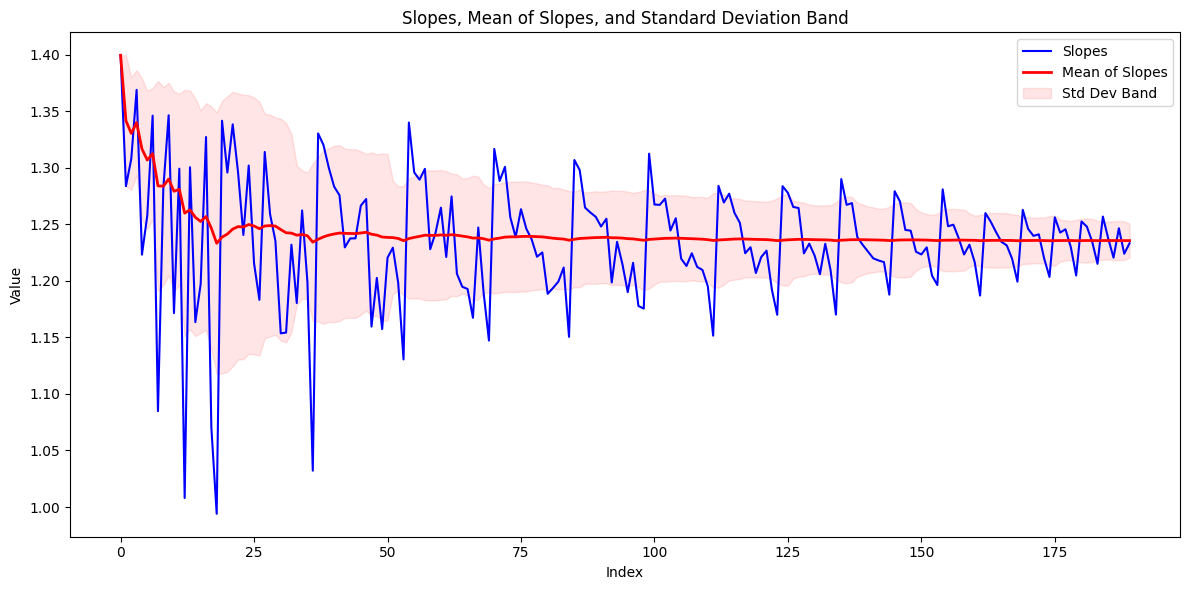

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_slope(x1, y1, x2, y2):
    return (y2 - y1) / (x2 - x1)

# Calculate slopes for every pair of points and their differences
slopes_with_diff = []
for i in range(len(Ring_no)):
    for j in range(i + 1, len(Ring_no)):
        slope_ij = calculate_slope(Ring_no[i], diaSquare[i], Ring_no[j], diaSquare[j])
        diff_ij = abs(Ring_no[j] - Ring_no[i])
        slopes_with_diff.append((slope_ij, diff_ij))

# Sort slopes by the difference between the points
slopes_with_diff.sort(key=lambda x: x[1])

# Extract the sorted slopes
sorted_slopes = [slope for slope, diff in slopes_with_diff]

# Convert sorted slopes to a numpy array
slopes = np.array(sorted_slopes)

# Calculate mean for all values and std for the last 15 values
means = []
std_devs = []
for i in range(1, len(slopes) + 1):
    mean_subset = slopes[:i]
    std_subset = slopes[max(0, i - 15):i]
    means.append(mean_subset.mean())
    std_devs.append(std_subset.std())

# Create the combined figure
plt.figure(figsize=(12, 6))

# Plot the slopes
plt.plot(slopes, label='Slopes', alpha=1, color='blue')

# Plot the mean of slopes
plt.plot(means, label='Mean of Slopes', color='red', linewidth=2)

# Plot the standard deviation band around the mean
means = np.array(means)
std_devs = np.array(std_devs)
plt.fill_between(range(len(means)), means - std_devs, means + std_devs, color='red', alpha=0.1, label='Std Dev Band')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Slopes, Mean of Slopes, and Standard Deviation Band')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

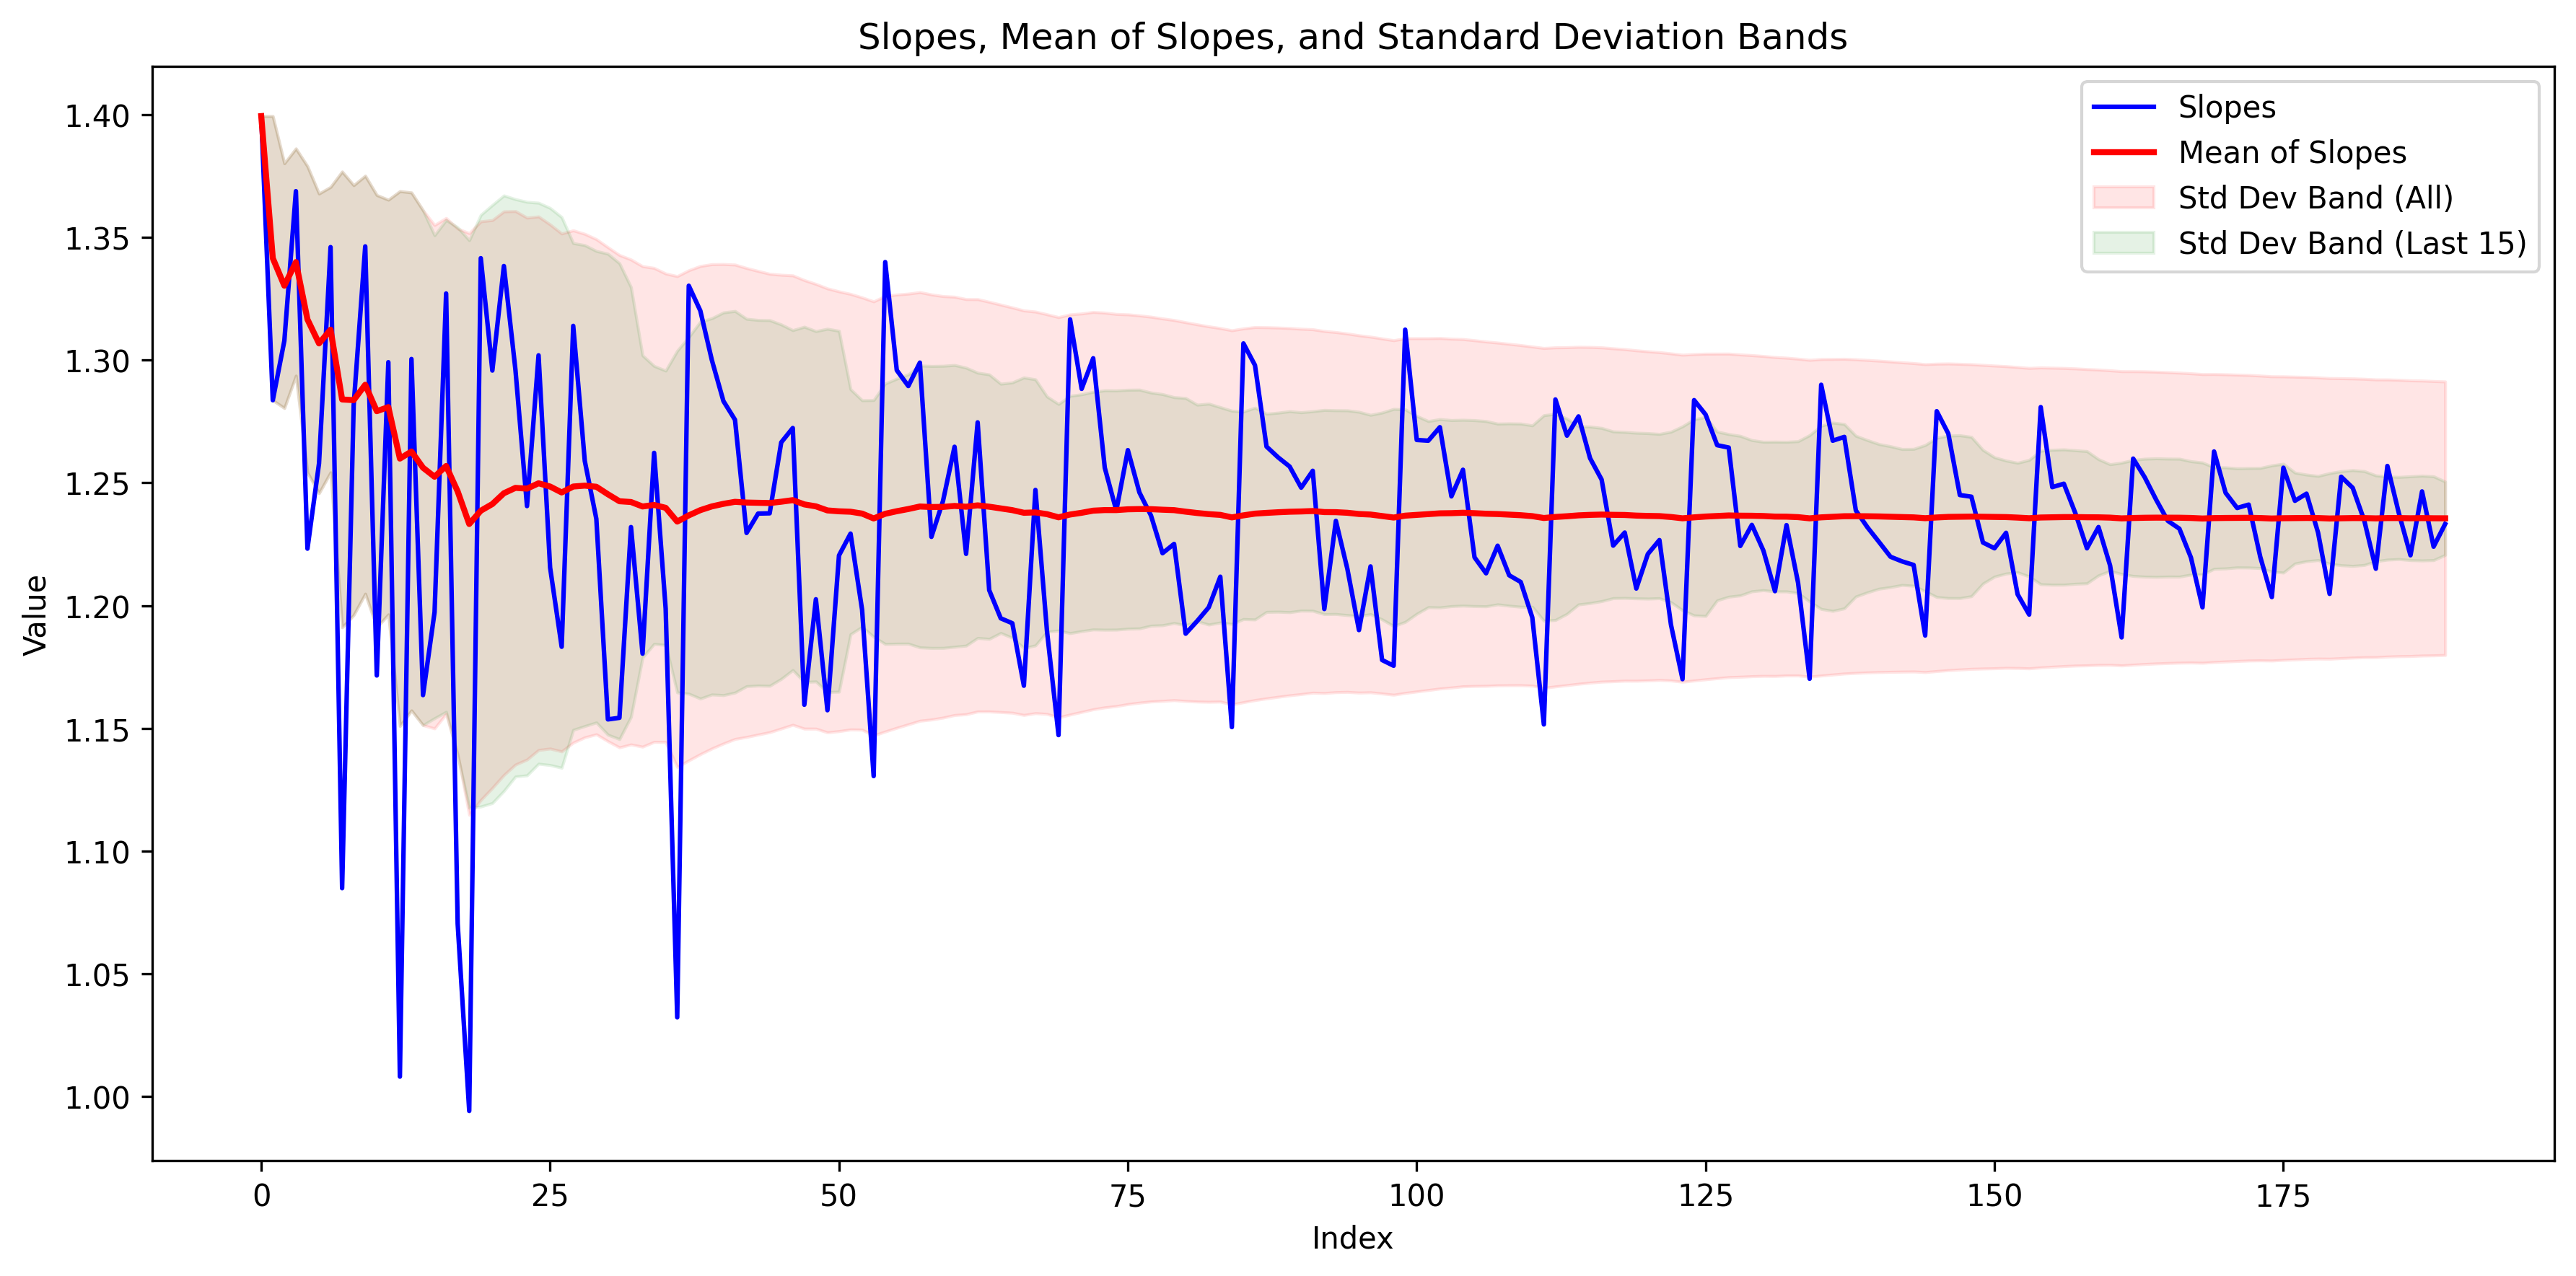

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_slope(x1, y1, x2, y2):
    return (y2 - y1) / (x2 - x1)

# Calculate slopes for every pair of points and their differences
slopes_with_diff = []
for i in range(len(Ring_no)):
    for j in range(i + 1, len(Ring_no)):
        slope_ij = calculate_slope(Ring_no[i], diaSquare[i], Ring_no[j], diaSquare[j])
        diff_ij = abs(Ring_no[j] - Ring_no[i])
        slopes_with_diff.append((slope_ij, diff_ij))

# Sort slopes by the difference between the points
slopes_with_diff.sort(key=lambda x: x[1])

# Extract the sorted slopes
sorted_slopes = [slope for slope, diff in slopes_with_diff]

# Convert sorted slopes to a numpy array
slopes = np.array(sorted_slopes)

# Calculate mean for all values and std for all values and the last 15 values
means = []
std_devs_all = []
std_devs_last_15 = []
for i in range(1, len(slopes) + 1):
    mean_subset = slopes[:i]
    std_subset_all = slopes[:i]
    std_subset_last_15 = slopes[max(0, i - 15):i]
    means.append(mean_subset.mean())
    std_devs_all.append(std_subset_all.std())
    std_devs_last_15.append(std_subset_last_15.std())

# Create the combined figure
plt.figure(figsize=(12, 6), dpi=300)  # Increase DPI for higher clarity

# Plot the slopes
plt.plot(slopes, label='Slopes', alpha=1, color='blue')

# Plot the mean of slopes
plt.plot(means, label='Mean of Slopes', color='red', linewidth=2)

# Plot the standard deviation band around the mean for all values
means = np.array(means)
std_devs_all = np.array(std_devs_all)
plt.fill_between(range(len(means)), means - std_devs_all, means + std_devs_all, color='red', alpha=0.1, label='Std Dev Band (All)')

# Plot the standard deviation band around the mean for the last 15 values
std_devs_last_15 = np.array(std_devs_last_15)
plt.fill_between(range(len(means)), means - std_devs_last_15, means + std_devs_last_15, color='green', alpha=0.1, label='Std Dev Band (Last 15)')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Slopes, Mean of Slopes, and Standard Deviation Bands')
plt.legend()

# Save the plot as a PDF
plt.tight_layout()
plt.savefig('slopes_plot.pdf', format='pdf')

# Show the plot
plt.show()

In [13]:
# Calculate mean for all values and std for all values and the last 15 values
means = []
std_devs_all = []
std_devs_last_15 = []
for i in range(1, len(slopes) + 1):
    mean_subset = slopes[:i]
    std_subset_all = slopes[:i]
    std_subset_last_15 = slopes[max(0, i - 15):i]
    means.append(mean_subset.mean())
    std_devs_all.append(std_subset_all.std())
    std_devs_last_15.append(std_subset_last_15.std())

# Print the final mean slope value
final_mean_slope = means[-1]
print("Final mean slope:", final_mean_slope)

Final mean slope: 1.2355698235704426
